# Quantum Teleportation Protocol with Random Gate Demonstration

This notebook demonstrates quantum teleportation using Qiskit.
A random single-qubit state is generated using a U3 gate (UGate),
then teleported from one qubit to another using quantum entanglement,
Bell-state measurement, and classical communication.

```

In [3]:
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.result import marginal_distribution
import random
from math import pi
from qiskit.circuit.library import UGate
from qiskit.visualization import array_to_latex
from IPython.display import display

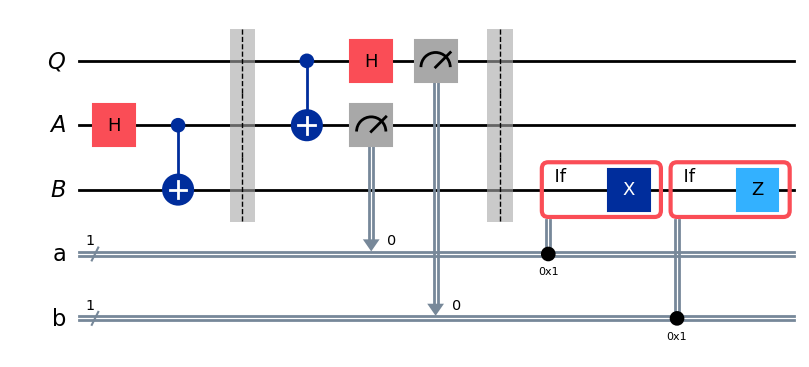

In [4]:
#defining Quantum and Classical registers
qubit = QuantumRegister(1,"Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1,"B")
a = ClassicalRegister(1,"a")
b = ClassicalRegister(1,"b")
protocol = QuantumCircuit(qubit,ebit0,ebit1,a,b)

#entanglemet
protocol.h(ebit0)
protocol.cx(ebit0,ebit1)
protocol.barrier()

#Alice's operations
protocol.cx(qubit,ebit0)
protocol.h(qubit)
protocol.measure(ebit0,a)
protocol.measure(qubit,b)
protocol.barrier()

#bob's operations
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)
    
%matplotlib inline
circuit = protocol.draw(output='mpl')
circuit.savefig("teleportation_circuit.png")

In [23]:
#create a random gate to apply on Q to demo teleportation
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

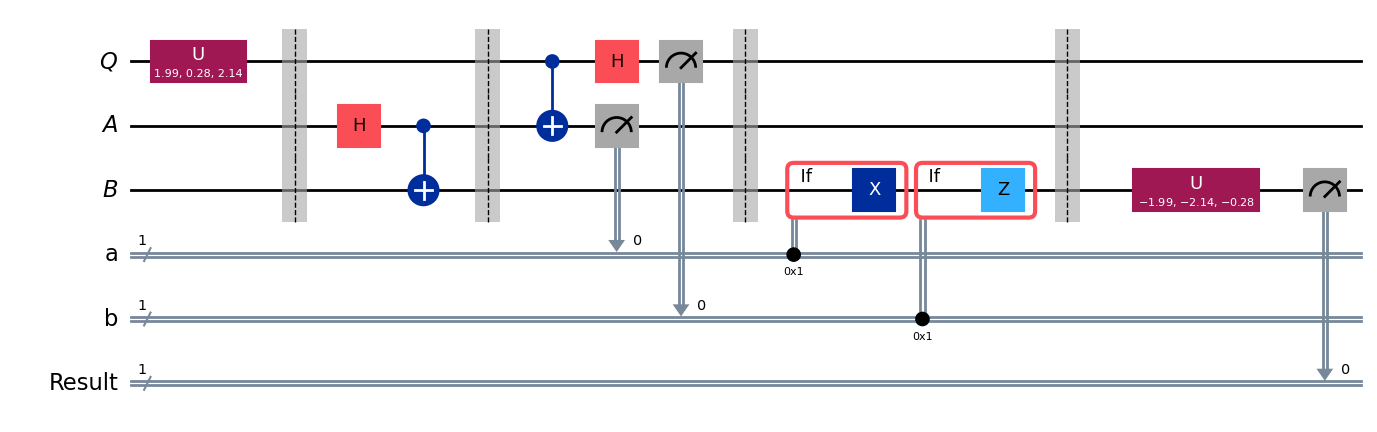

In [25]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

test_circuit = test.draw(output="mpl")
test_circuit.savefig("test_circuit.png")

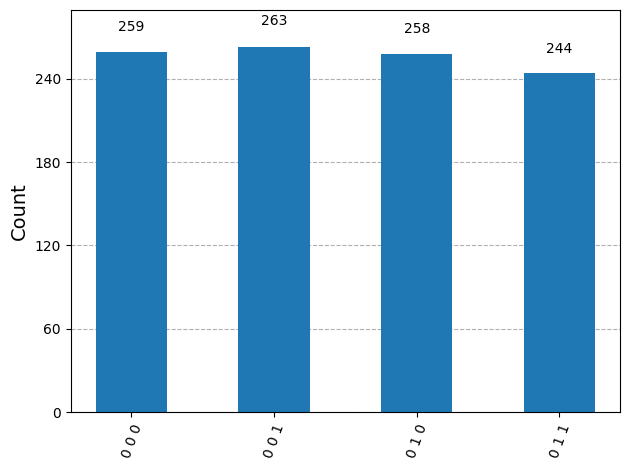

In [27]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
graph = plot_histogram(statistics)
graph.savefig("statistics.png")
plt.show() 

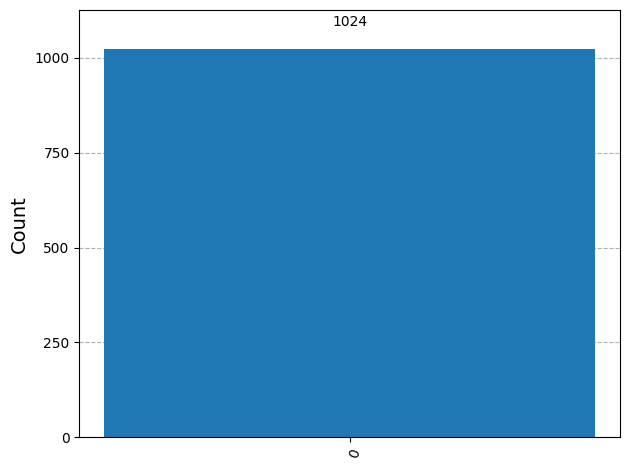

In [29]:
filtered_statistics = marginal_distribution(statistics, [2])
marginalised_graph = plot_histogram(filtered_statistics)
marginalised_graph.savefig("ma")
plt.show()